In [148]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [149]:
img1 = cv.imread("../DATA/dog_backpack.jpg")
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2 = cv.imread("../DATA/watermark_no_copy.png")
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)


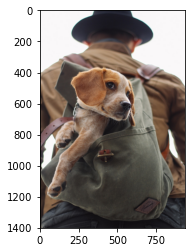

In [150]:
plt.imshow(img1) ;

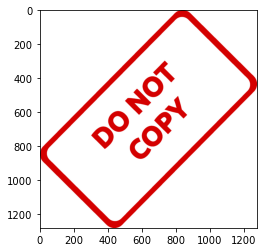

In [151]:
plt.imshow(img2) ;

In [152]:
print(f"shape of image 1: {img1.shape}")
print(f"shape of image 2: {img2.shape}")

shape of image 1: (1401, 934, 3)
shape of image 2: (1280, 1277, 3)


## Blending images of same size

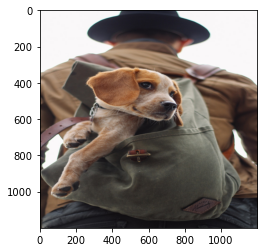

In [153]:
img1 = cv.resize(img1, (1200,1200))
img2 = cv.resize(img2, (1200,1200))
plt.imshow(img1) ;


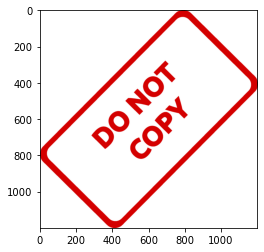

In [154]:
plt.imshow(img2) ;

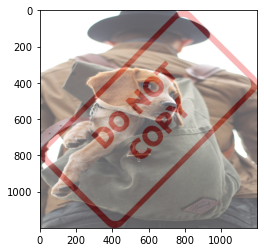

In [155]:
blended = cv.addWeighted(src1 = img1, alpha = 0.7, src2 = img2, beta = 0.3,gamma = 10 )
plt.imshow(blended) ;

## Overlay images on each other [ Different sizes ] 

In [156]:
# Numpy reassignment
img1 = cv.imread("../DATA/dog_backpack.jpg")
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2 = cv.imread("../DATA/watermark_no_copy.png")
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

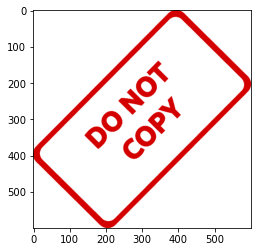

In [157]:
img2 = cv.resize(img2, (600,600))
plt.imshow(img2) ;

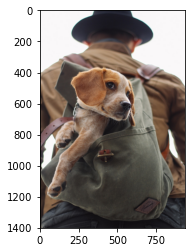

In [158]:
plt.imshow(img1) ;

In [159]:
large_img = img1
small_img = img2

In [160]:
x_offset = 150
y_offset = 200

x_end = x_offset + small_img.shape[1]
y_end = y_offset + small_img.shape[0]

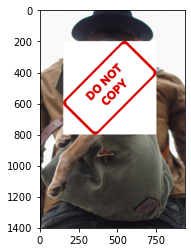

In [161]:
large_img[y_offset:y_end,x_offset:x_end] = small_img
plt.imshow(large_img) ;

## Masking Object for Overlay/Blending

In [162]:
# Read files
img1 = cv.imread("../DATA/dog_backpack.jpg")
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2 = cv.imread("../DATA/watermark_no_copy.png")
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

In [163]:
img2 = cv.resize(img2, (600,600))

In [164]:
img2gray = cv.cvtColor(img2, cv.COLOR_RGB2GRAY)

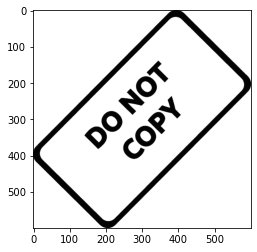

In [165]:
plt.imshow(img2gray, cmap = "gray") ;

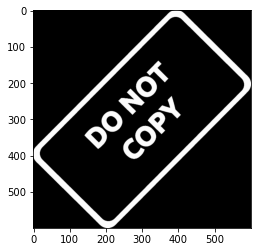

In [166]:
mask_inv = cv.bitwise_not(img2gray)
plt.imshow(mask_inv, cmap = "gray") ;

In [167]:
mask_inv.shape 

# Notice how the dimensions are missing for color mapping , 
# we need to add those for creating a mask and overlay image

(600, 600)

In [168]:
white_bg = np.full(img2.shape, 255)

In [169]:
white_bg.shape

(600, 600, 3)

In [170]:
bg = cv.bitwise_or(white_bg, white_bg, mask = mask_inv)
bg.shape

(600, 600, 3)

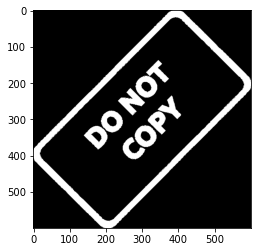

In [171]:
plt.imshow(bg) ;

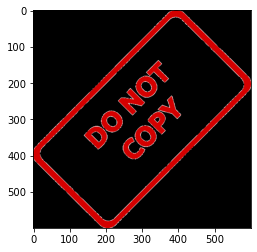

In [172]:
fg_img = cv.bitwise_or(img2, img2, mask = mask_inv)
plt.imshow(fg_img) ;

In [173]:
img1.shape

(1401, 934, 3)

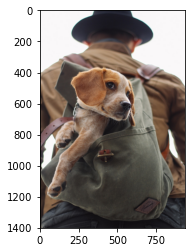

In [174]:
plt.imshow(img1) ;

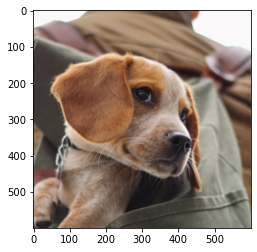

In [175]:
x_offset = 750 - 600
y_offset = 850 - 600
x_end = x_offset + 600
y_end  = y_offset + 600
rows, cols, channels = img1.shape
large_img_cut = img1[y_offset:y_end,x_offset:x_end]
plt.imshow(large_img_cut) ;

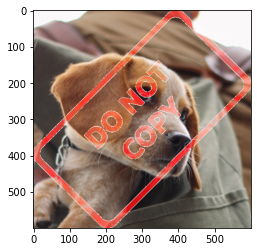

In [176]:
final_img = cv.bitwise_or(large_img_cut, fg_img)
plt.imshow(final_img) ;

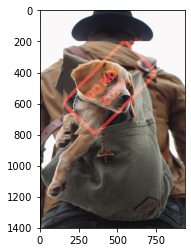

In [177]:
large_img = img1
small_img = final_img
x_offset = 150
y_offset = 200

x_end = x_offset + small_img.shape[1]
y_end = y_offset + small_img.shape[0]

large_img[y_offset:y_end,x_offset:x_end] = small_img
plt.imshow(large_img) ;